## LLM project : Fooling LLMs on Benchmark with permutations and symbol adversarial attacks

In [32]:
from LLMs_attack import *
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [33]:
# WARNING : WILL OVERRRIDE THE PREVIOUS FILE
def save():
    with open("accuracy.pkl", "wb") as f:
        pickle.dump(accuracy, f)
        print("accuracy.pkl saved")

In [34]:
def load():
    accuracy = {}
    try:
        with open("accuracy.pkl", "rb") as f:
            accuracy = pickle.load(f)
            print("Loaded accuracy.pkl")
    except:
        print("Could not load accuracy.pkl")
    return accuracy

## Running Experiments

In [35]:
args = argparse.Namespace(
ntrain=0,
data_dir="data/MMLU",
engine=["qwen1"],
n_reduced=None,
use_subset=True,
subset_size = 2,
permutation_attack=False,
position_permute=False,
reduce_attack=False,
load_in_8bit=False,
verbose = True,
stop_attack = False,
subset_subjects = 2,
)

In [36]:
# main(args)

In [37]:
args.permutation_attack = True
args.subset_size = 1
args.subset_subjects = 1

In [38]:
# main(args)

In [39]:
args.subset_size = 100
args.subset_subjects = 10
args.verbose = False
args.permutation_attack = False
args.engine = ["qwen1","llama-3b"]
accuracy = {}

In [40]:
# accuracy['standard'] = main(args)

In [41]:
# save()

In [42]:
args.subset_size = 50
args.position_permute = True
# accuracy['pos_permute'] = main(args)

In [43]:
# save()

In [44]:
args.position_permute = False
args.permutation_attack = True
# accuracy['attack'] = main(args)

In [45]:
# save()

## Analysis of the results

In [46]:
# Load data
accuracy = load()

#Print the shape of the data
print('Accuracy keys : ', accuracy.keys())
print('Number of dictionnary of information : ', len(accuracy['standard'])) # accuracy_dic, cors_dic, avg_dic
print('First : accuracy_dic, Second : cors_dic, Third : avg_dic')
print('Keys of the accuracy_dic (accuracy on each dataset) : ', accuracy['standard'][0].keys()) # qwen1, llama-3b
print('Number of datasets : ', len(accuracy['standard'][0]['qwen1'])) # 10 datasets
print('Results on each question (number of question): ', len(accuracy['standard'][1]['qwen1'][0])) 
print('Third diccionnary : ', accuracy['standard'][2], ' empty if no attack')
print('third dicconary : average across all permutation, computed onll if attack. Size : ', len(accuracy['attack'][2]['qwen1'][1])) #10*50
print('For pos permute : ', accuracy['pos_permute'][0]['qwen1'][0]) # List (10 dataset) of dictionnary (number of permutation : 4)

# Extract data using the original structure for the stard evaluation (baseline)
standard_accuracy_qwen1 = np.array(accuracy['standard'][0]['qwen1']) 
standard_accuracy_llama = np.array(accuracy['standard'][0]['llama-3b'])

# Extract data for pas_permute 
pos_permute_accuracy_qwen1 = np.array(accuracy['pos_permute'][0]['qwen1'])
pos_permute_accuracy_llama = np.array(accuracy['pos_permute'][0]['llama-3b'])

#Extract data for attack 
attack_average_qwen1 = np.array(accuracy['attack'][2]['qwen1'])
attack_average_llama = np.array(accuracy['attack'][2]['llama-3b'])

# average over each dataset : 1 if average = 1 0 else
attack_accuracy_qwen1 = np.mean(attack_average_qwen1 == 1, axis=1)
attack_accuracy_llama = np.mean(attack_average_llama == 1, axis=1)

Loaded accuracy.pkl
Accuracy keys :  dict_keys(['standard', 'pos_permute', 'attack'])
Number of dictionnary of information :  3
First : accuracy_dic, Second : cors_dic, Third : avg_dic
Keys of the accuracy_dic (accuracy on each dataset) :  dict_keys(['qwen1', 'llama-3b'])
Number of datasets :  10
Results on each question (number of question):  100
Third diccionnary :  {}  empty if no attack
third dicconary : average across all permutation, computed onll if attack. Size :  50
For pos permute :  {'A': np.float64(0.12), 'B': np.float64(0.58), 'C': np.float64(0.18), 'D': np.float64(0.62)}


In [47]:
# Define constants
FIELDS = [
    'abstract_algebra', 'anatomy', 'astronomy', 'business_ethics',
    'clinical_knowledge', 'college_biology', 'college_chemistry',
    'college_computer_science', 'college_mathematics', 'college_medicine'
]

MODELS = ['qwen1', 'llama-3b']

FIELD_DISPLAY_NAMES = {
    'abstract_algebra': 'Abstract Algebra',
    'anatomy': 'Anatomy',
    'astronomy': 'Astronomy',
    'business_ethics': 'Business Ethics',
    'clinical_knowledge': 'Clinical Knowledge',
    'college_biology': 'Biology',
    'college_chemistry': 'Chemistry',
    'college_computer_science': 'Computer Science',
    'college_mathematics': 'Mathematics',
    'college_medicine': 'Medicine'
}

colors= ['#1f77b4', '#ff7f0e', '#2ca02c']

field_data = []
for i, field in enumerate(FIELDS):
    
    qwen_std_acc = standard_accuracy_qwen1[i]
    llama_std_acc = standard_accuracy_llama[i]
    qwen_attack_valid = attack_accuracy_qwen1[i]
    llama_attack_valid = attack_accuracy_llama[i]
    qwen_attack_average = attack_average_qwen1[i].mean()
    llama_attack_average = attack_average_llama[i].mean()
    
    # Calculate worst-case pos_permute accuracy for each field
    qwen_pos_perm_acc = min(pos_permute_accuracy_qwen1[i][option] for option in 'ABCD')
    llama_pos_perm_acc = min(pos_permute_accuracy_llama[i][option] for option in 'ABCD')
    
    # Calculate for each case the pos_permute accuracy for each field
    qwen_pos_perm_acc_A = pos_permute_accuracy_qwen1[i]['A']
    qwen_pos_perm_acc_B = pos_permute_accuracy_qwen1[i]['B']
    qwen_pos_perm_acc_C = pos_permute_accuracy_qwen1[i]['C']
    qwen_pos_perm_acc_D = pos_permute_accuracy_qwen1[i]['D']
    llama_pos_perm_acc_A = pos_permute_accuracy_llama[i]['A']
    llama_pos_perm_acc_B = pos_permute_accuracy_llama[i]['B']
    llama_pos_perm_acc_C = pos_permute_accuracy_llama[i]['C']
    llama_pos_perm_acc_D = pos_permute_accuracy_llama[i]['D']
   
    field_data.append({
        'Field': field,
        'Display_Name': FIELD_DISPLAY_NAMES[field],
        'QWen1_Standard_Acc': qwen_std_acc,
        'Llama3b_Standard_Acc': llama_std_acc,
        'QWen1_Attack_Valid': qwen_attack_valid,
        'Llama3b_Attack_Valid': llama_attack_valid,
        'QWen1_Pos_Perm_Acc': qwen_pos_perm_acc,
        'Llama3b_Pos_Perm_Acc': llama_pos_perm_acc,
        'QWen1_Pos_Perm_Acc_A': qwen_pos_perm_acc_A,
        'QWen1_Pos_Perm_Acc_B': qwen_pos_perm_acc_B,
        'QWen1_Pos_Perm_Acc_C': qwen_pos_perm_acc_C,
        'QWen1_Pos_Perm_Acc_D': qwen_pos_perm_acc_D,
        'Llama3b_Pos_Perm_Acc_A': llama_pos_perm_acc_A,
        'Llama3b_Pos_Perm_Acc_B': llama_pos_perm_acc_B,
        'Llama3b_Pos_Perm_Acc_C': llama_pos_perm_acc_C,
        'Llama3b_Pos_Perm_Acc_D': llama_pos_perm_acc_D,
        'QWen1_Attack_Average': qwen_attack_average,
        'Llama3b_Attack_Average': llama_attack_average
    })

<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Felix_Houdouin\AppData\Local\Temp\ipykernel_150628\2811834978.py:27: SyntaxWarning: invalid escape sequence '\o'
  plt.savefig('Images\overall_model_accuracy.png', dpi=300, bbox_inches='tight')
C:\Users\Felix_Houdouin\AppData\Local\Temp\ipykernel_150628\2811834978.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Standard_Accuracy', data=df_overall, palette=[COLORS['qwen1'], COLORS['llama-3b']], ax=ax1)


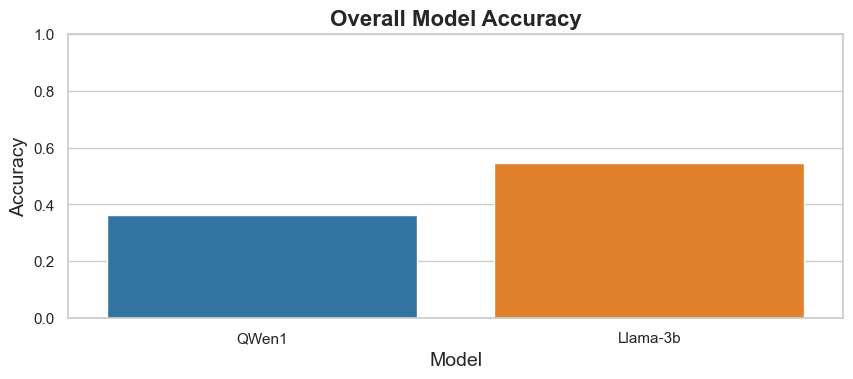

In [48]:
# Create DataFrames - preserving the original structure while adding display names
df_fields = pd.DataFrame(field_data)
df_overall = pd.DataFrame({
    'Model': ['QWen1', 'Llama-3b'],
    'Standard_Accuracy': [np.mean(standard_accuracy_qwen1), np.mean(standard_accuracy_llama)]
})

# Define colors for consistent visualization
COLORS = {'qwen1': '#1f77b4', 'llama-3b': '#ff7f0e'}

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Create a figure with GridSpec for layout
fig = plt.figure(figsize=(22, 30))
gs = GridSpec(5, 2, height_ratios=[1, 1.5, 1.5, 1.5, 1.5])

# Overall Accuracy
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(x='Model', y='Standard_Accuracy', data=df_overall, palette=[COLORS['qwen1'], COLORS['llama-3b']], ax=ax1)
ax1.set_title('Overall Model Accuracy', fontsize=16, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_xlabel('Model', fontsize=14)

plt.savefig('Images\overall_model_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()



<>:29: SyntaxWarning: invalid escape sequence '\A'
<>:29: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Felix_Houdouin\AppData\Local\Temp\ipykernel_150628\1601927128.py:29: SyntaxWarning: invalid escape sequence '\A'
  plt.savefig('Images\Average_performance_across_fields.png', dpi=300, bbox_inches='tight')


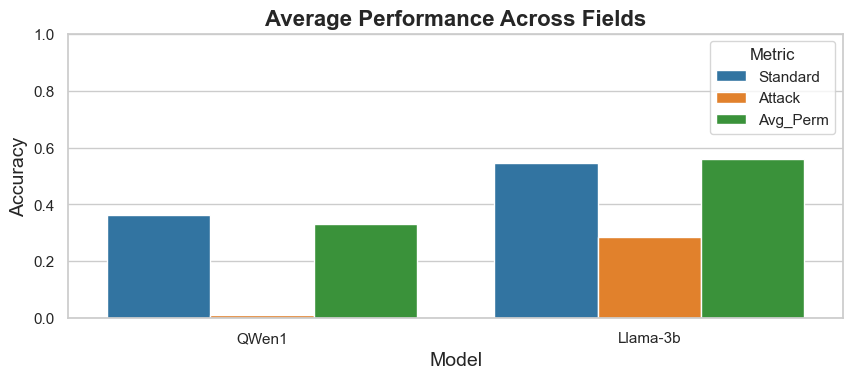

In [49]:
# Create a figure with GridSpec for layout
fig = plt.figure(figsize=(22, 30))
gs = GridSpec(5, 2, height_ratios=[1, 1.5, 1.5, 1.5, 1.5])

# Performance Comparison (Side by Side for Standard, Attack, and avg_perm)
ax2 = fig.add_subplot(gs[0, 1])
avg_performance = pd.DataFrame({
    'Metric': ['Standard', 'Attack', 'Avg_Perm'],
    'QWen1': [
        df_fields['QWen1_Standard_Acc'].mean(),
        df_fields['QWen1_Attack_Valid'].mean(),
        df_fields['QWen1_Attack_Average'].mean()
    ],
    'Llama-3b': [
        df_fields['Llama3b_Standard_Acc'].mean(),
        df_fields['Llama3b_Attack_Valid'].mean(),
        df_fields['Llama3b_Attack_Average'].mean()
    ]
})
avg_performance = pd.melt(avg_performance, id_vars=['Metric'], value_vars=['QWen1', 'Llama-3b'],
                            var_name='Model', value_name='Accuracy')
sns.barplot(x='Model', y='Accuracy', hue='Metric', data=avg_performance, palette=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=ax2)
ax2.set_title('Average Performance Across Fields', fontsize=16, fontweight='bold')
ax2.set_ylim(0, 1)
ax2.set_ylabel('Accuracy', fontsize=14)
ax2.set_xlabel('Model', fontsize=14)
ax2.legend(title='Metric', loc='upper right')

plt.savefig('Images\Average_performance_across_fields.png', dpi=300, bbox_inches='tight')
plt.show()

<>:57: SyntaxWarning: invalid escape sequence '\c'
<>:57: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Felix_Houdouin\AppData\Local\Temp\ipykernel_150628\1017569522.py:57: SyntaxWarning: invalid escape sequence '\c'
  plt.savefig('Images\comprehensive_performance_analysis.png', dpi=300, bbox_inches='tight')


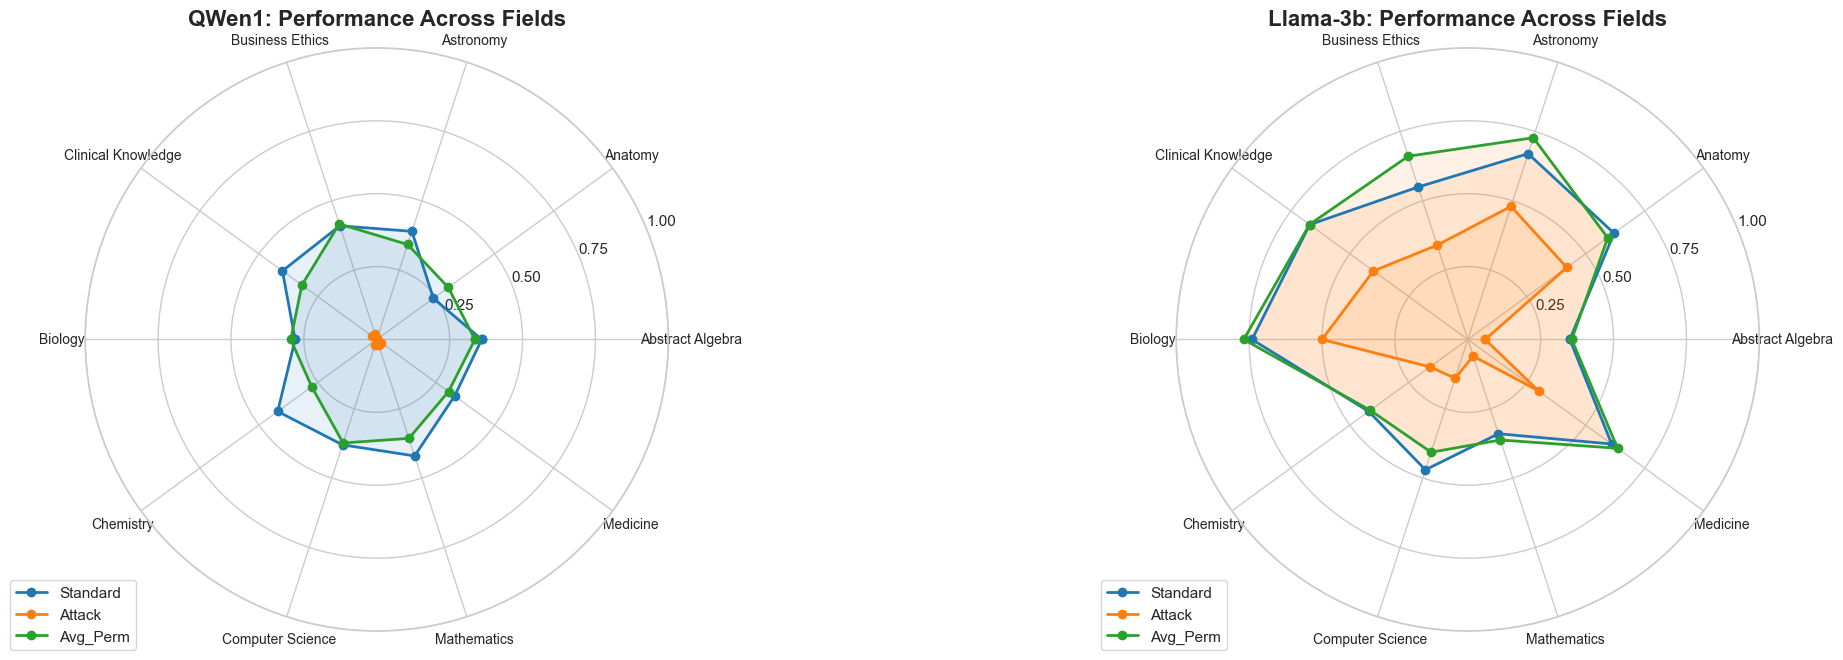

In [50]:
# Create a figure with GridSpec for layout
fig = plt.figure(figsize=(22, 30))
gs = GridSpec(5, 2, height_ratios=[1, 1.5, 1.5, 1.5, 1.5])


ax3 = fig.add_subplot(gs[1, 0], polar=True)
ax4 = fig.add_subplot(gs[1, 1], polar=True)

# Prepare data for radar chart
categories = df_fields['Display_Name'].tolist()
qwen_values = [
    df_fields['QWen1_Standard_Acc'].tolist(),
    df_fields['QWen1_Attack_Valid'].tolist(),
    df_fields['QWen1_Attack_Average'].tolist()
]
llama_values = [
    df_fields['Llama3b_Standard_Acc'].tolist(),
    df_fields['Llama3b_Attack_Valid'].tolist(),
    df_fields['Llama3b_Attack_Average'].tolist()
]

# Number of fields
N = len(categories)

# Compute the angle for each field
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Plot QWen1
for i, values in enumerate(qwen_values):
    values += values[:1]
    ax3.plot(angles, values, 'o-', linewidth=2, label=['Standard', 'Attack', 'Avg_Perm'][i], color=colors[i])
    ax3.fill(angles, values, alpha=0.1, color=COLORS['qwen1'])

# Plot Llama-3b
for i, values in enumerate(llama_values):
    values += values[:1]
    ax4.plot(angles, values, 'o-', linewidth=2, label=['Standard', 'Attack', 'Avg_Perm'][i], color=colors[i])
    ax4.fill(angles, values, alpha=0.1, color=COLORS['llama-3b'])

# Set labels and styling for both radar charts
for ax in [ax3, ax4]:
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(['0.25', '0.50', '0.75', '1.00'])
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

ax3.set_title('QWen1: Performance Across Fields', fontsize=16, fontweight='bold')
ax4.set_title('Llama-3b: Performance Across Fields', fontsize=16, fontweight='bold')


# Adjust layout
plt.tight_layout()

plt.savefig('Images\comprehensive_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
def plot_split_field_comparison(model_name, standard_accuracy, pos_permute_accuracy):
    plt.figure(figsize=(14, 8))
    
    # Number of conditions
    n_fields = len(FIELDS)
    n_conditions = 6  # Baseline, A, B, C, D, Worst
    bar_width = 0.12
    
    # Set positions for the bars
    indices = np.arange(n_fields)
    
    # Plot bars for each field and condition
    for f_idx, field in enumerate(FIELDS):
        # Model data
        baseline = standard_accuracy[f_idx]
        a_val = pos_permute_accuracy[f_idx]['A']
        b_val = pos_permute_accuracy[f_idx]['B']
        c_val = pos_permute_accuracy[f_idx]['C']
        d_val = pos_permute_accuracy[f_idx]['D']
        if model_name == 'Qwen1':
            worst_val = attack_accuracy_qwen1[f_idx]
        else:
            worst_val = attack_accuracy_llama[f_idx]
        
        # Plot bars
        plt.bar(indices[f_idx] - 2.5*bar_width, baseline, bar_width, color='darkblue', label='Baseline' if f_idx == 0 else "")
        plt.bar(indices[f_idx] - 1.5*bar_width, a_val, bar_width, color='royalblue', label='A' if f_idx == 0 else "")
        plt.bar(indices[f_idx] - 0.5*bar_width, b_val, bar_width, color='cornflowerblue', label='B' if f_idx == 0 else "")
        plt.bar(indices[f_idx] + 0.5*bar_width, c_val, bar_width, color='lightskyblue', label='C' if f_idx == 0 else "")
        plt.bar(indices[f_idx] + 1.5*bar_width, d_val, bar_width, color='lightblue', label='D' if f_idx == 0 else "")
        plt.bar(indices[f_idx] + 2.5*bar_width, worst_val, bar_width, color='crimson', label='Worst' if f_idx == 0 else "")
    
    # Customize plot
    plt.xlabel('Fields')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name}: Performance Across Fields and Conditions')
    plt.xticks(indices, [FIELD_DISPLAY_NAMES[field] for field in FIELDS], rotation=45, ha='right')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig('Images/'+f'{model_name.lower()}_field_comparison.png')
    plt.show()

In [52]:
def plot_confidence_vs_drop():
    plt.figure(figsize=(12, 8))
    
    # Prepare data for scatter plot
    confidences = []  # Mean accuracy across 24 permutations (confidence)
    drops = []        # Drop in performance
    labels = []       # Labels for points
    model_colors = {'qwen1': 'blue', 'llama-3b': 'green'}
    
    # Process Qwen1 data
    for f_idx, field in enumerate(FIELDS):
        # Mean across 24 permutations as confidence indicator
        confidence = np.mean(attack_average_qwen1[f_idx])
        
        # Drop from baseline to worst case
        baseline = standard_accuracy_qwen1[f_idx]
        worst_case = np.mean(attack_average_qwen1[f_idx]==1)
        drop = baseline - worst_case
        
        confidences.append(confidence)
        drops.append(drop)
        labels.append(f"Qwen1 - {FIELD_DISPLAY_NAMES[field]}")
    
    # Process Llama data
    for f_idx, field in enumerate(FIELDS):
        # Mean across 24 permutations as confidence indicator
        confidence = np.mean(attack_average_llama[f_idx])
        
        # Drop from baseline to worst case
        baseline = standard_accuracy_llama[f_idx]
        worst_case = np.mean(attack_average_llama[f_idx]==1)
        drop = baseline - worst_case
        
        confidences.append(confidence)
        drops.append(drop)
        labels.append(f"Llama - {FIELD_DISPLAY_NAMES[field]}")
    
    # Create model designations for coloring
    model_designations = ['Qwen1'] * len(FIELDS) + ['Llama-3b'] * len(FIELDS)
    
    # Create a DataFrame for easier plotting with seaborn
    import pandas as pd
    scatter_data = pd.DataFrame({
        'Confidence': confidences,
        'Performance Drop': drops,
        'Label': labels,
        'Model': model_designations
    })
    
    # Create the scatter plot with seaborn
    sns.scatterplot(
        data=scatter_data, 
        x='Confidence', 
        y='Performance Drop', 
        hue='Model', 
        s=100,
        alpha=0.7,
        palette={'Qwen1': 'blue', 'Llama-3b': 'green'}
    )
    
    # Add labels to points
    for i, txt in enumerate(scatter_data['Label']):
        field_name = txt.split(' - ')[1]
        plt.annotate(
            field_name, 
            (scatter_data['Confidence'][i], scatter_data['Performance Drop'][i]),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8
        )
    
    # Add a linear regression line for each model
    sns.regplot(
        data=scatter_data[scatter_data['Model'] == 'Qwen1'], 
        x='Confidence', 
        y='Performance Drop', 
        scatter=False, 
        color='blue', 
        line_kws={'linestyle': '--'}
    )
    
    sns.regplot(
        data=scatter_data[scatter_data['Model'] == 'Llama-3b'], 
        x='Confidence', 
        y='Performance Drop', 
        scatter=False, 
        color='green', 
        line_kws={'linestyle': '--'}
    )
    
    # Customize plot
    plt.xlabel('Confidence (Mean Accuracy Across 24 Permutations)')
    plt.ylabel('Performance Drop (Baseline - Worst Case)')
    plt.title('Relationship Between Model Confidence and Performance Drop')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('Images/confidence_vs_drop.png') # save in folder
    plt.show()

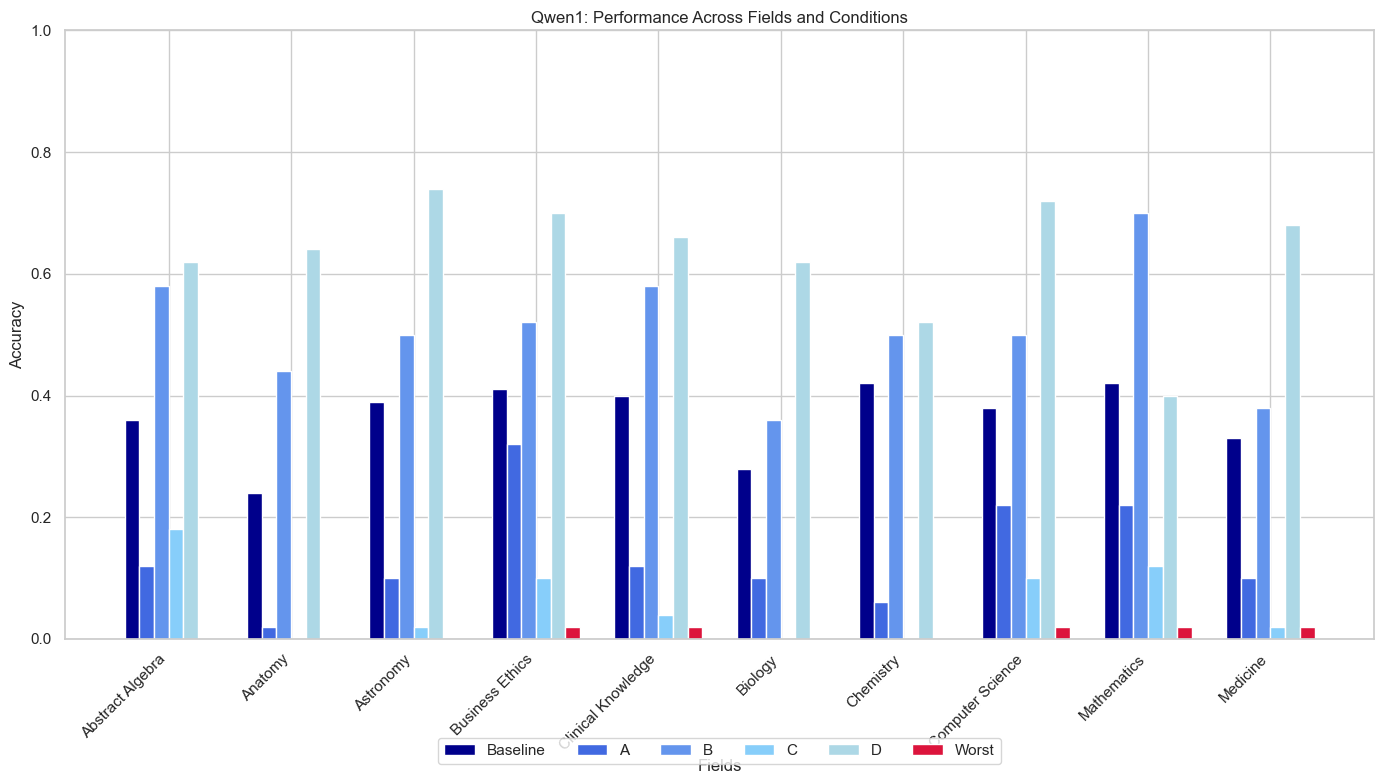

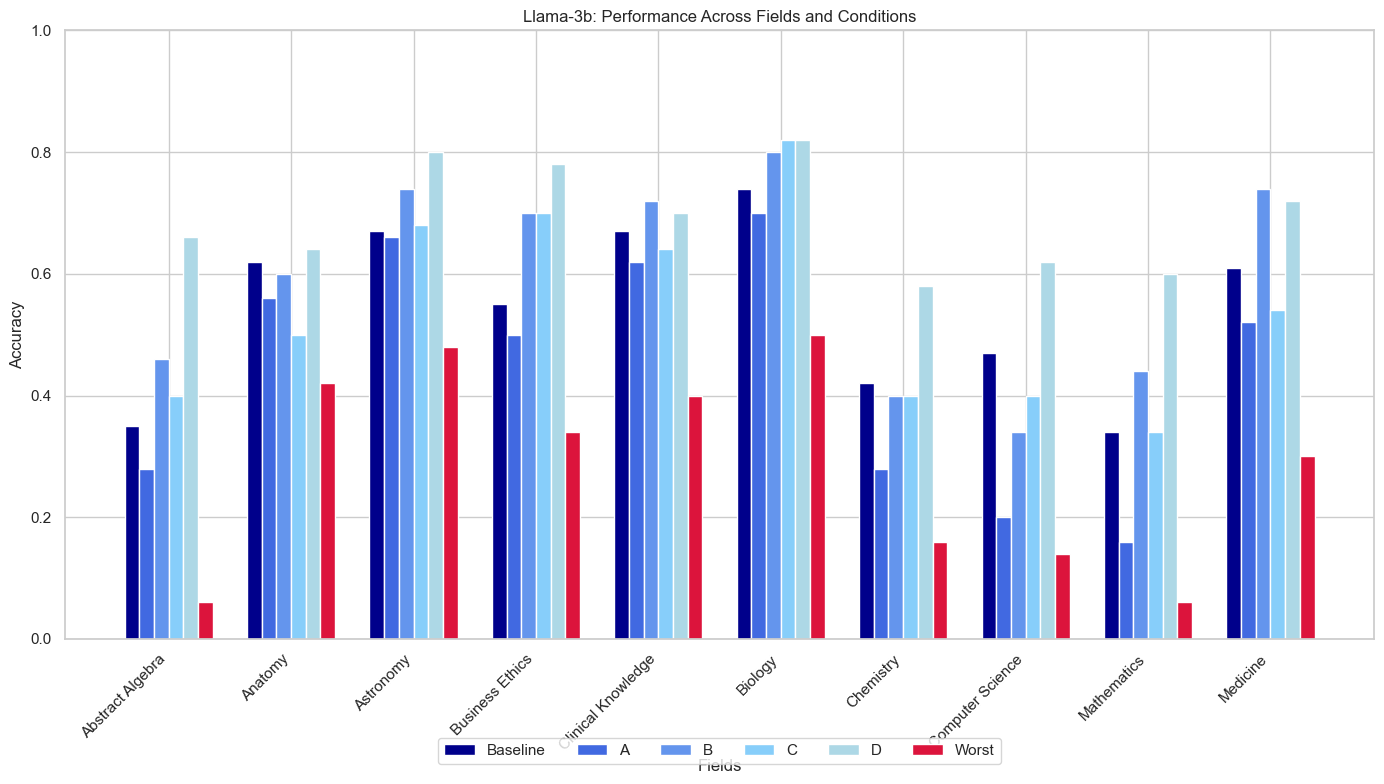

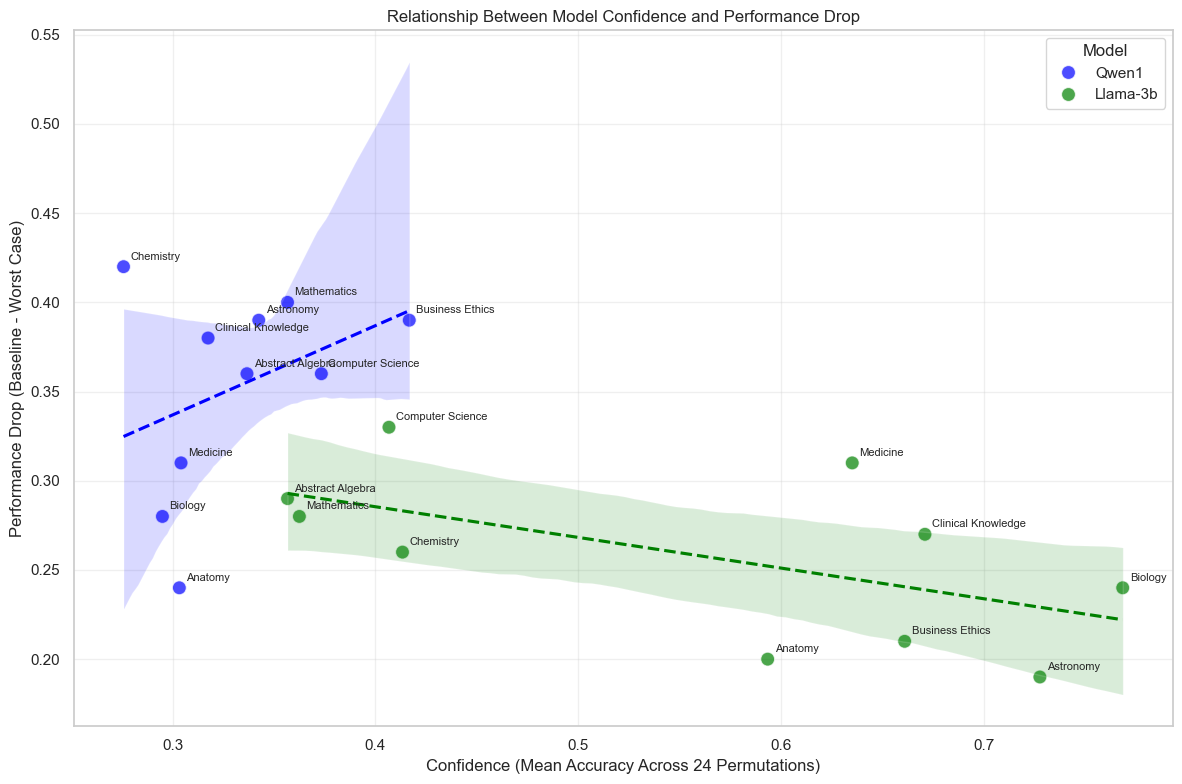

In [53]:
plot_split_field_comparison('Qwen1', standard_accuracy_qwen1, pos_permute_accuracy_qwen1)
plot_split_field_comparison('Llama-3b', standard_accuracy_llama, pos_permute_accuracy_llama)

plot_confidence_vs_drop()

## Key takeaways

### Introduction of the Paper

In this paper, we use two pretrained models to run the attacks from *"Fool Your (Vision and) Language Model With Embarrassingly Simple Permutations"*. The paper demonstrates how to generate adversarial attacks on LLMs using classical benchmarks, such as MMLU.

To achieve this, they attack the questions by either permuting the order of the answers or by modifying the symbols at the beginning of the question (e.g., replacing "A." with "1."). We reproduced some of the results from the paper.

---

### Overall Quality of the Models

Due to limited computational resources, we used relatively small models for our experiments: **QWEN1** and **LLaMA-3B**. The results on the benchmark are satisfactory, but we could achieve much better performance with larger models:

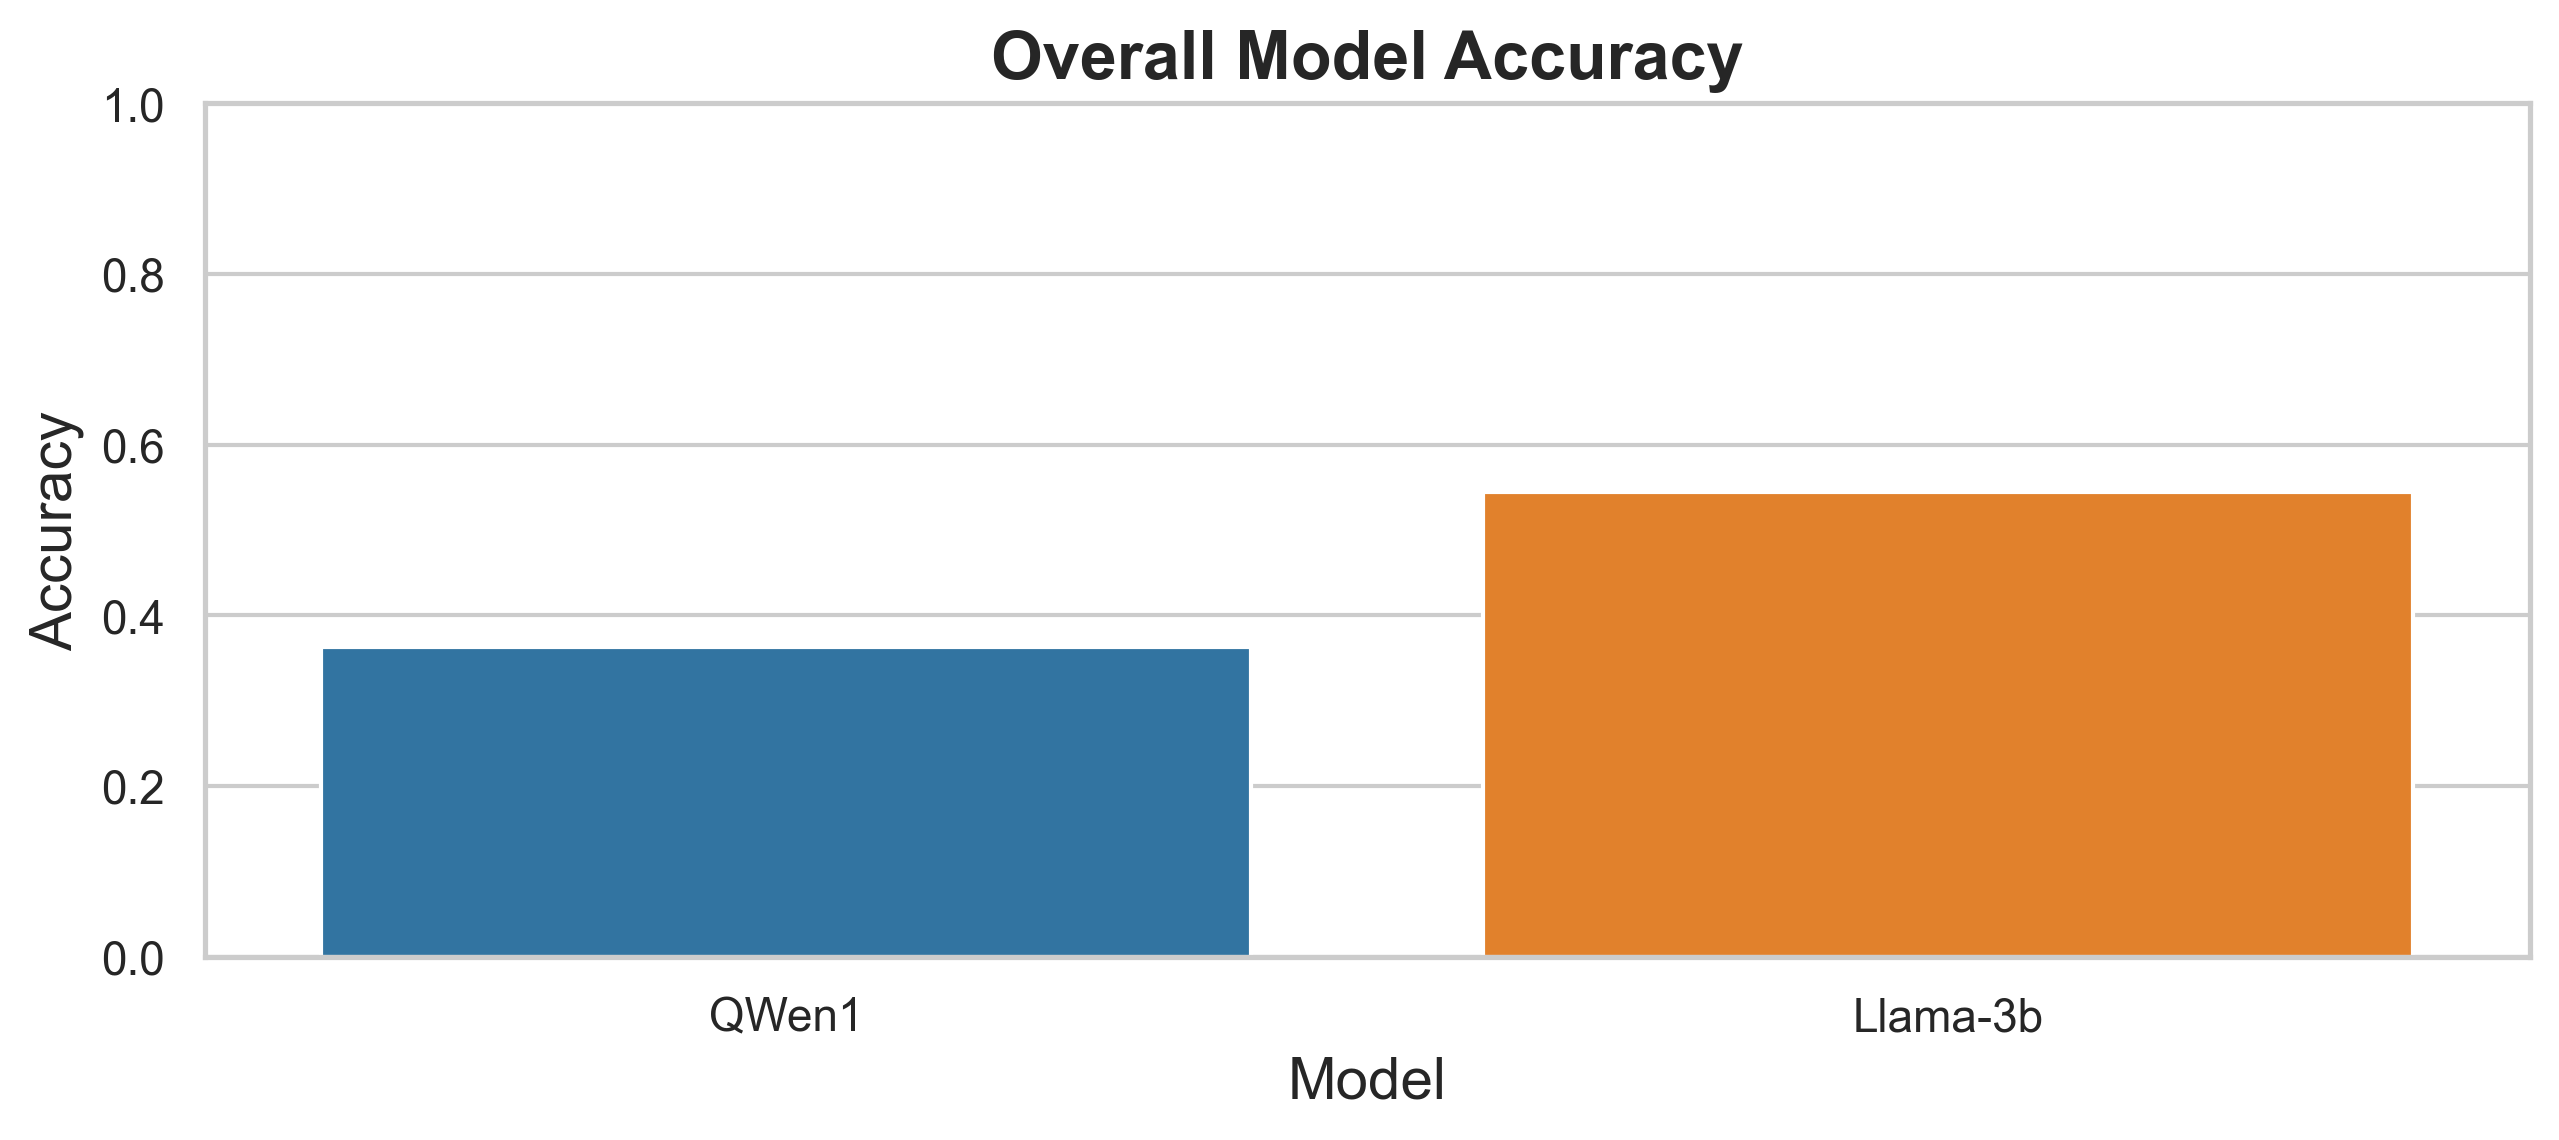

Note that a model answering randomly should achieve a score of $0.25$. With this in mind, we observe that **QWEN1** is not strong enough to correctly answer more than a few questions. However, a more careful analysis shows that both models can perform well on the easy datasets.

---

### Attacks Used on the Models

We employed two types of attacks:

1. **Full Permutation**: Testing all possible configurations of the answer options and selecting the *worst-case* performance. We also report the average performance for a more in-depth analysis.
2. **Answer Permutation**: Fixing the correct answer in a specific position (A/B/C/D) and measuring the accuracy for each. This allowed us to analyze any biases in selecting a particular answer (A, B, C, or D).

We performed the tests using classical benchmark questions from fields like algebra, anatomy, and astronomy from the MMLU dataset.

---

### Impact of the Attacks

The performance drop is mild on LLaMA but significant on QWEN:

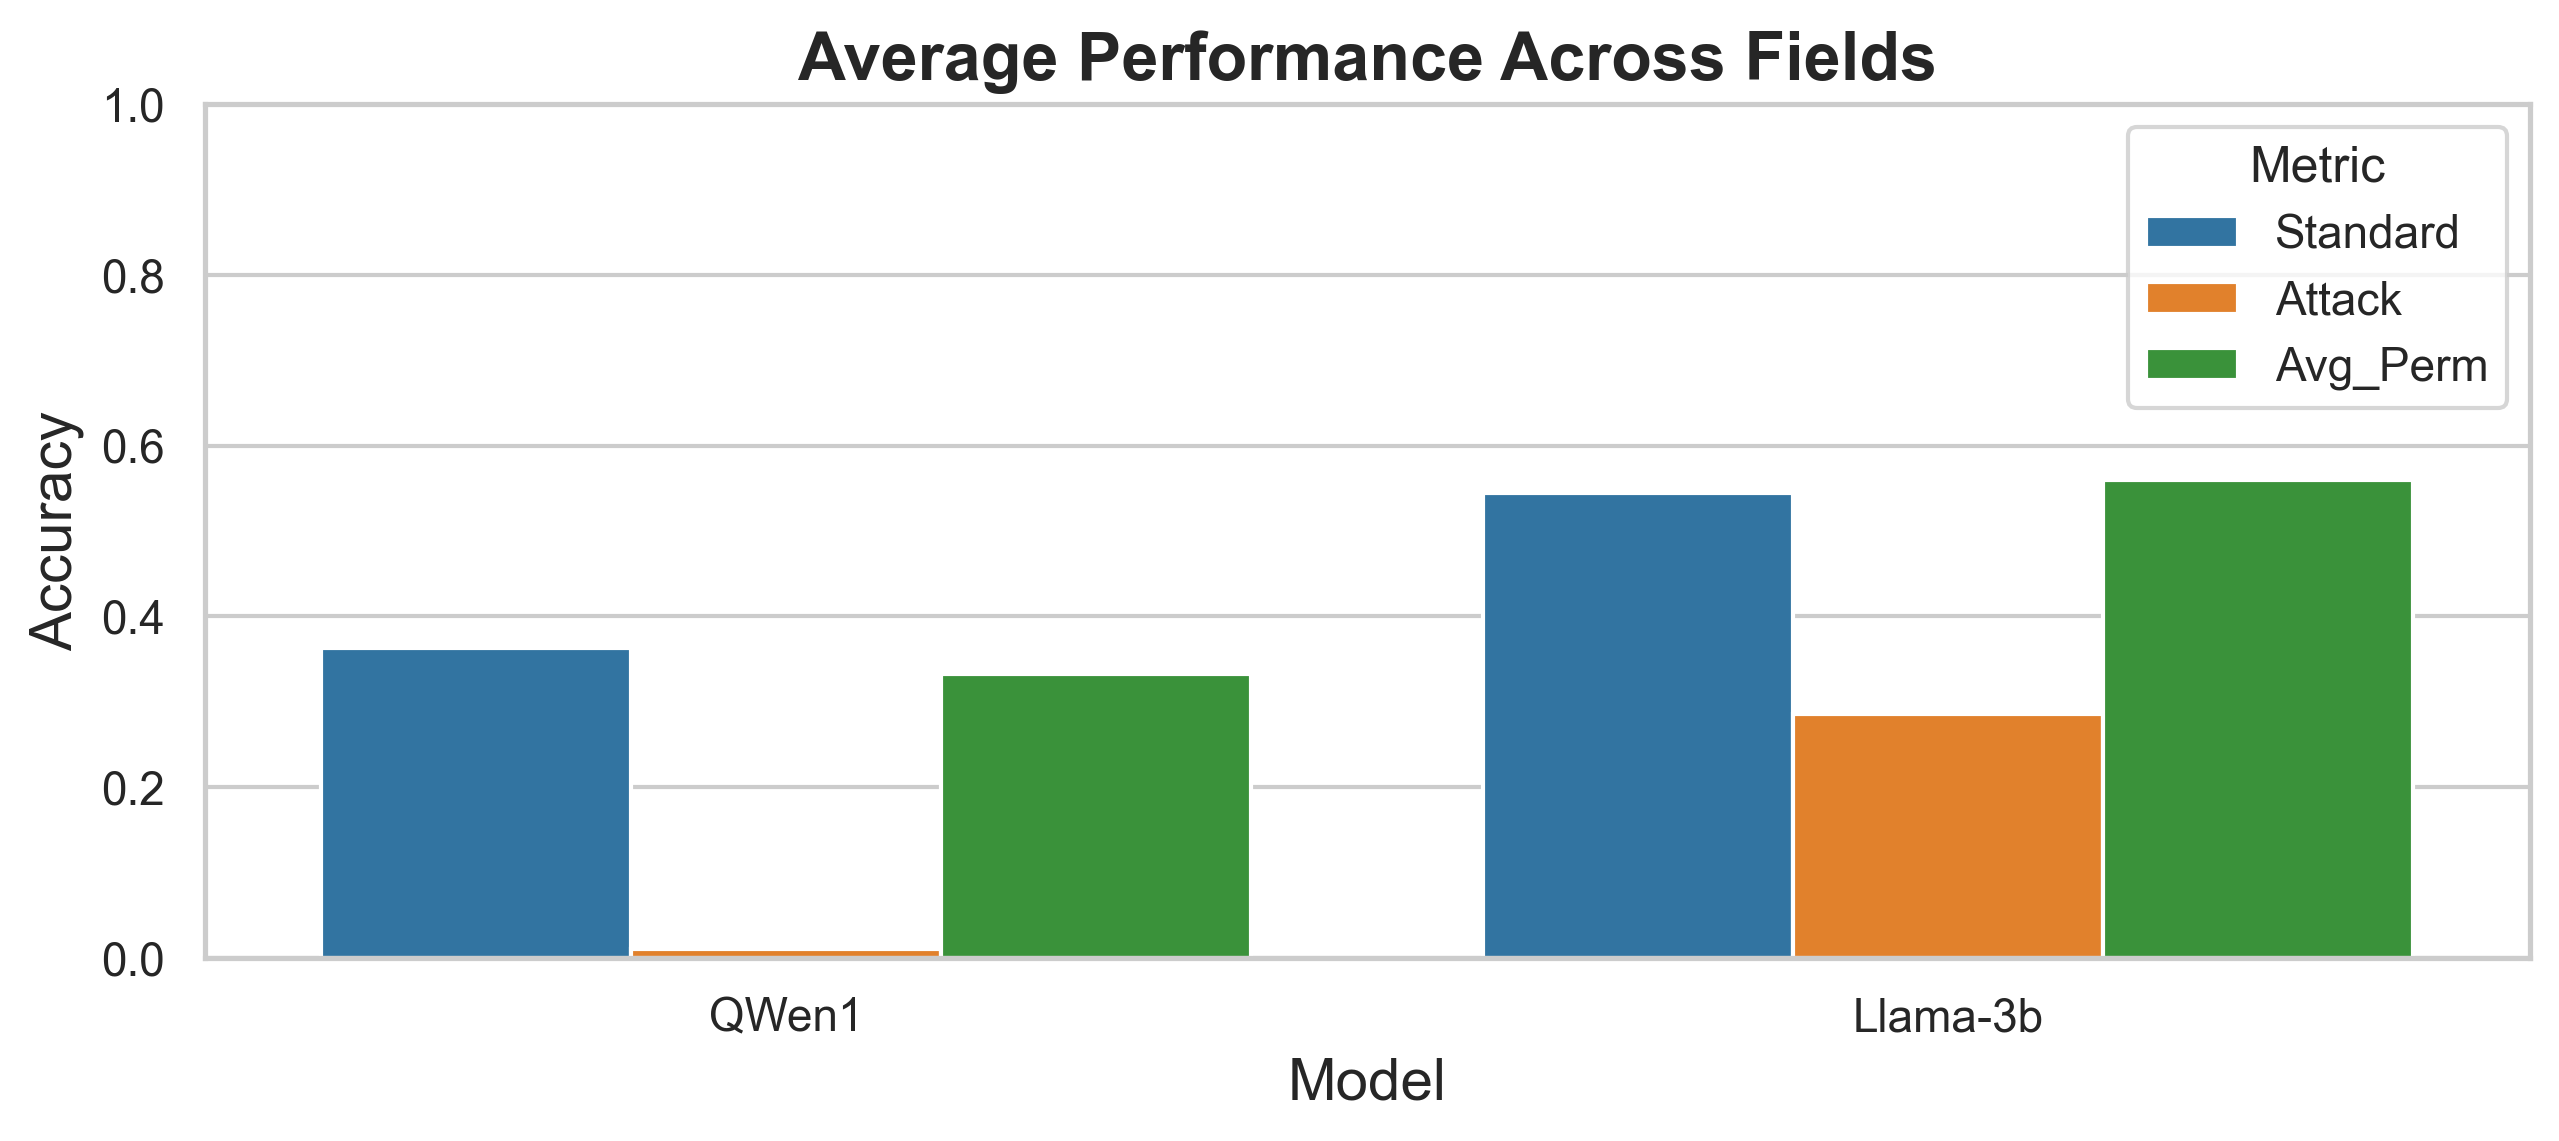

This result was expected: the QWEN model already had low confidence, so an adversarial perturbation made it almost impossible for it to randomly select the correct answer. We also observed that the average score across all permutations was the same as with the initial order, indicating that the models had not learned the questions during training. This was expected, as we used small models.

---

### Field Dependence

We also observed that the relative performance across fields remained consistent:

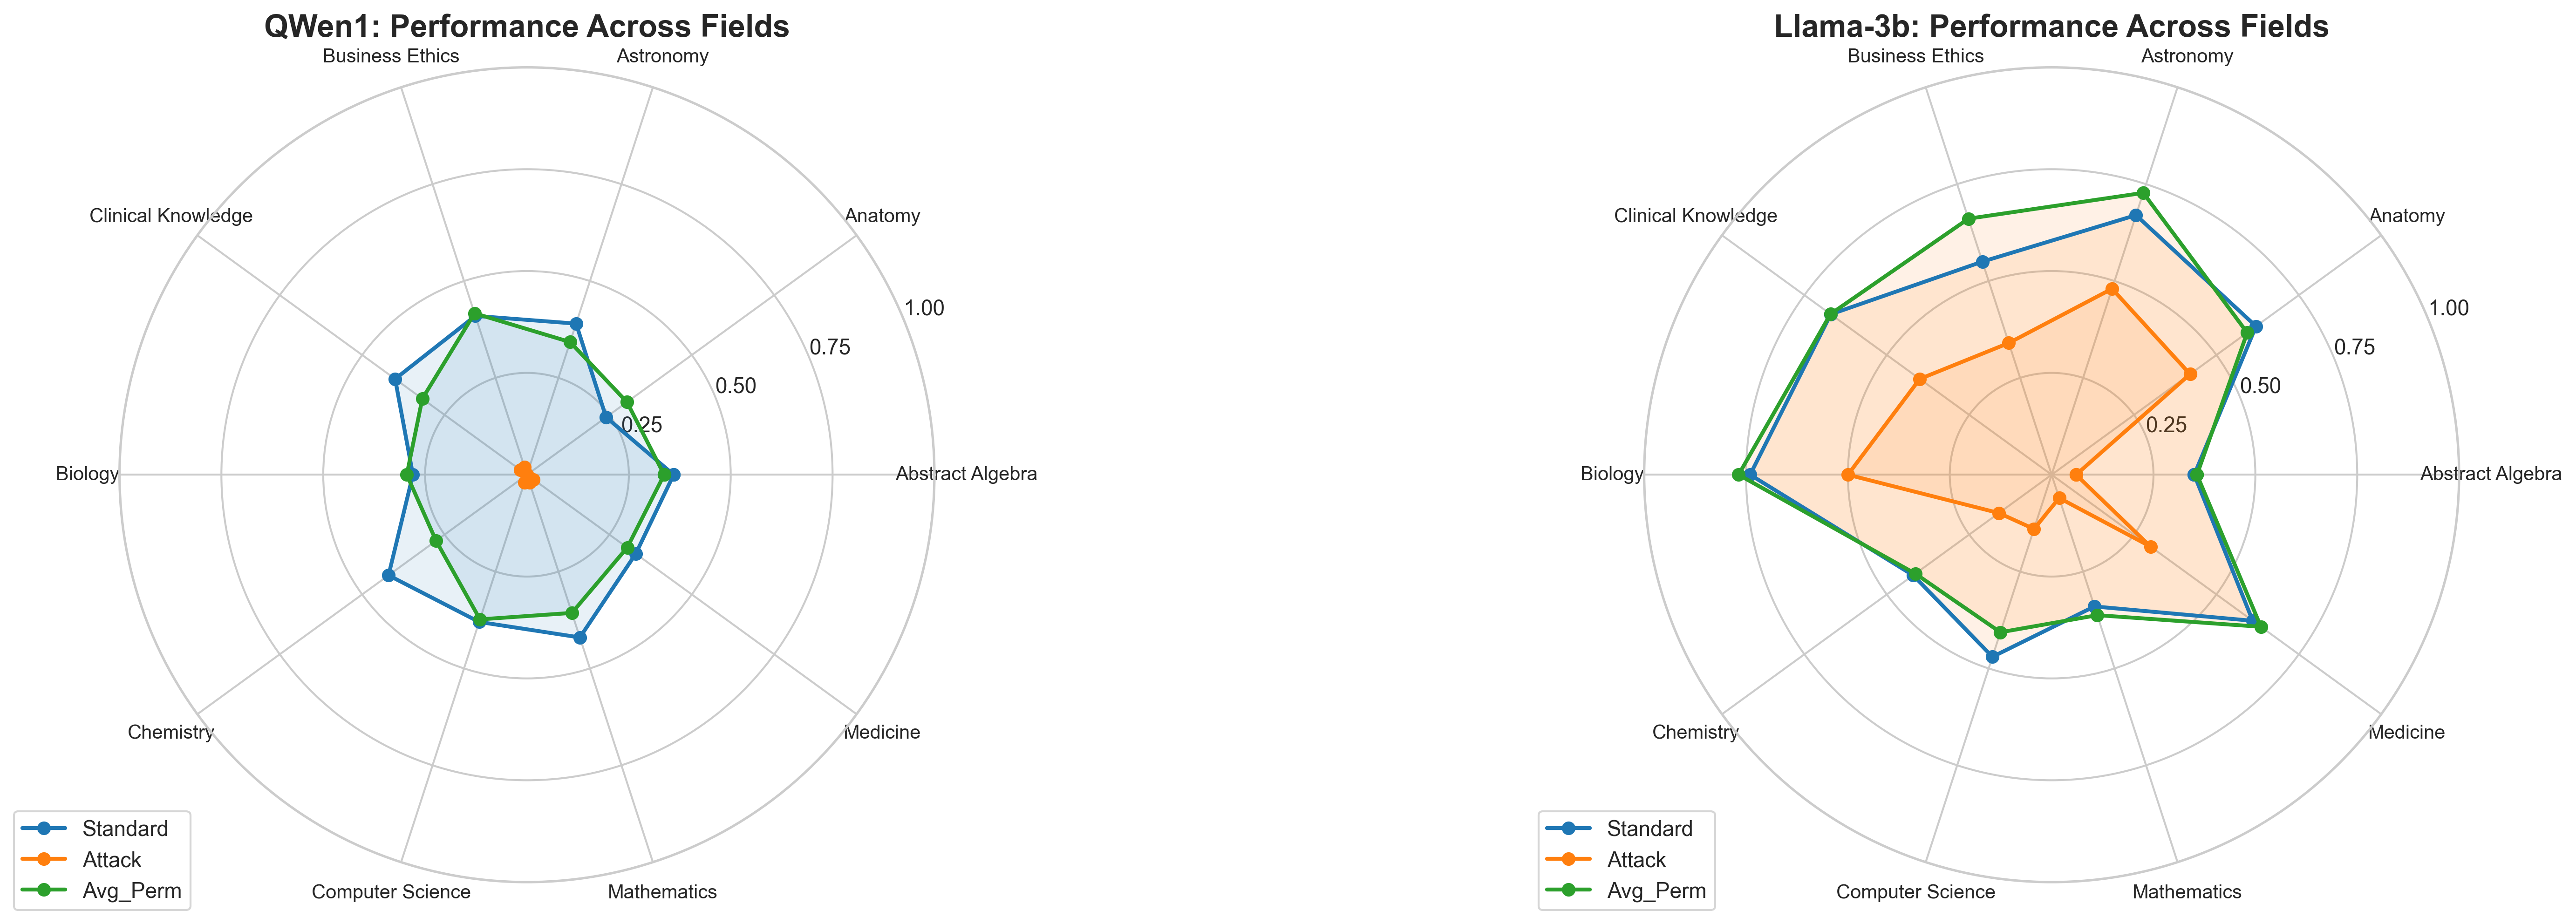

Again, the results were very similar between the initial order of the questions and the average score across all permutations. The minimum performance over all permutations—i.e., the permutation attack—was much worse, as expected.

---

### Position Bias Analysis

In this experiment, we moved the correct answer to different positions (A, B, C, or D).

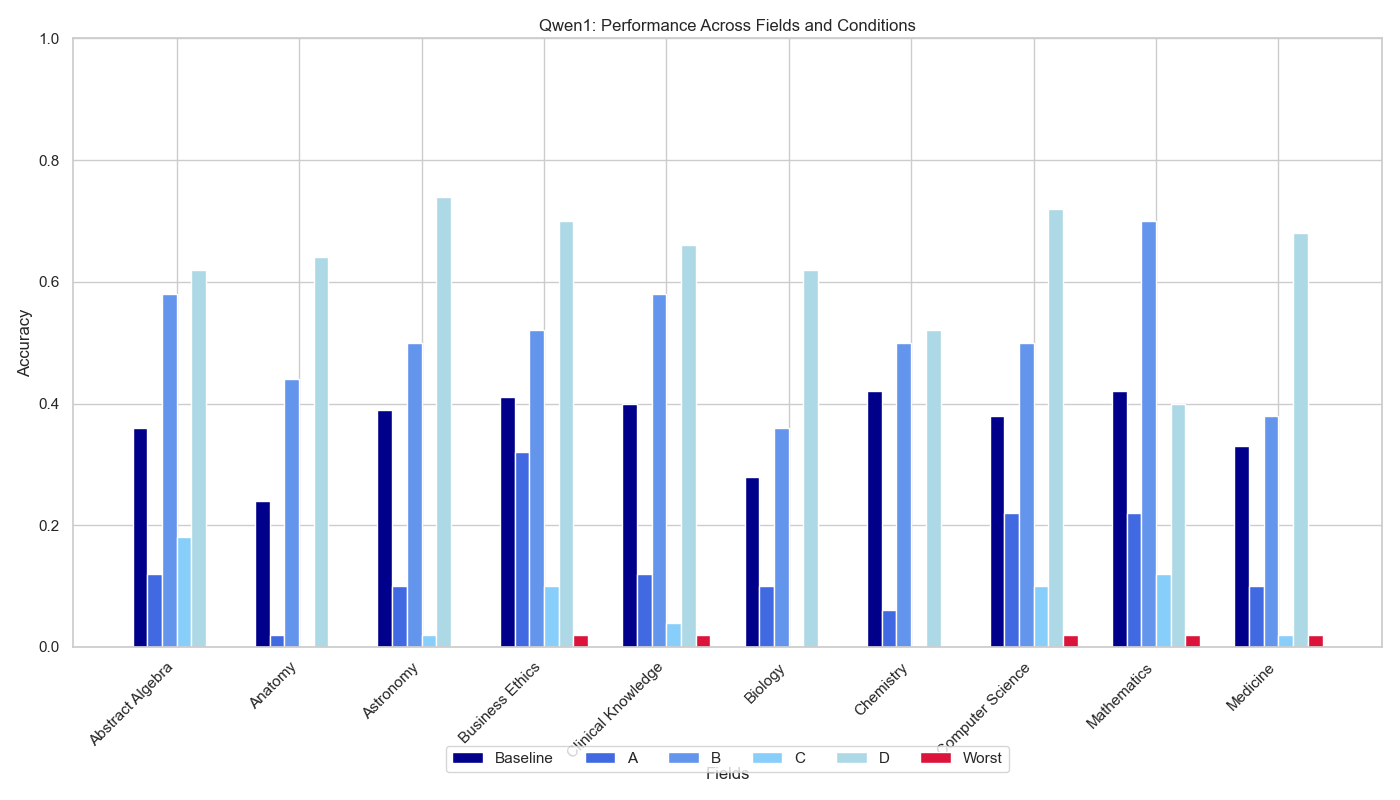

We observed a strong position bias in the QWEN1 model. When QWEN1 was unsure about the answer (which was most of the time), it randomly selected between B and D. This bias was also present in LLaMA-3B, although less visible because the model answered less randomly. We see that the results were significantly better for response D.

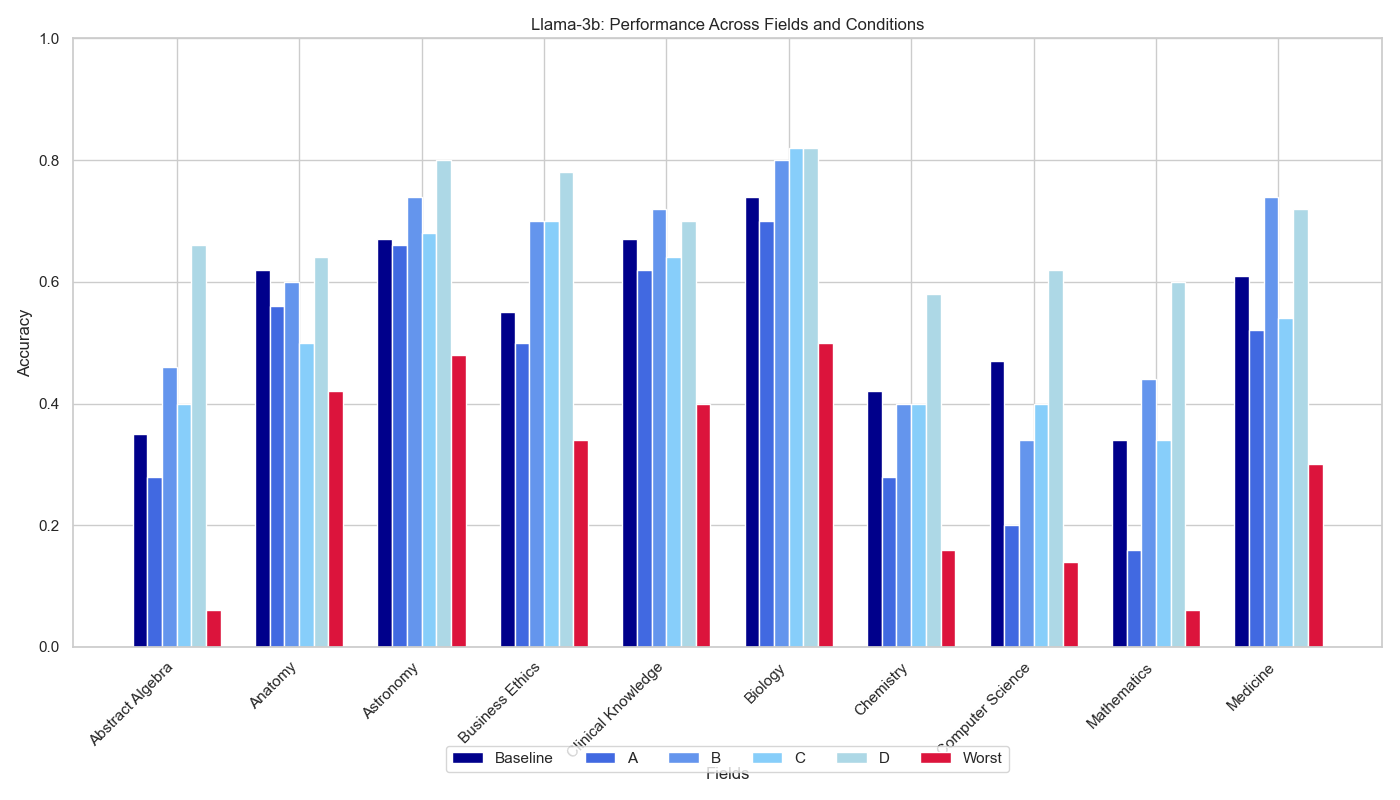

---

### Explaining the Performance Drop

Interestingly, the paper does not analyze in detail the reasons behind the performance drops. They claim: "Specifically, we show empirically that popular models are vulnerable to adversarial permutation in answer sets for multiple-choice prompting, which is surprising since models should ideally be as invariant to prompt permutation as humans are." 

However, we believe this is not surprising and that humans are not invariant to permutation attacks either.

We can offer some intuition. If we model the LLM as a **probabilistic model** that selects an answer randomly (in a deterministic way) based on its internal confidence, then running it over **24 permutations** increases the chance of picking the wrong answer. In the worst-case evaluation (taking the lowest score across permutations), a performance drop is expected, especially for models that are already uncertain.

If the model has no idea what the correct answer is, it picks a random answer (which is biased) and has an expected probability of exactly $\frac{1}{4}$ of answering correctly if the answers are permuted randomly. When it has to answer the same question 24 times with all possible permutations, its probability is at most $\frac{1}{4^{24}}$ (with equality if the model is unbiased) of answering correctly to all permutations. The same happens with a human: if given a test like the Abstract Algebra dataset, a human would likely answer randomly to each question. If asked multiple times with different permutations, they may give the same answer each time, but this is only due to his memory—something that an LLM could also do if we let the previous permutation in his context. If a human is asked the same question multiple times with enough time in between, he could also be vulnerable to a permutation attack. This observation is enough to explain the performance drop: the model only retains answers where it is 100% confident.

Some benchmarks may have been partially leaked into training datasets (especially for QWEN). Models might rely on memorized formats, and changing those formats can significantly degrade performance. In fact, we do not observe any difference between the average result across all permutations and the initial order. This could be observed with larger models.

From this perspective, the performance drop is not necessarily a sign of failure, but rather a statistical outcome of aggregating results by taking the minimum over many different inputs.

---

### Protecting LLMs Against Adversarial Attacks Exploiting Randomness and Lack of Memory

If you give the following prompt to the chat: "Give me a random number between 1 and 5," the answer will be something like, "Here's a random number between 1 and 5: 3." This is the same weakness exploited in our attacks. While humans may also struggle to give a truly random answer, they can remember their previous answers and adapt. However, if we can access an LLM, we can brute-force prompts to trick the LLM into always failing to give the correct answer.

Here are several ways to tackle this problem:

- For multiple-choice evaluation, one could always add an "I don't know" option, specifying that a different incorrect answer would result in a penalty equal to the threshold of confidence we want to enforce.
- More generally, adding randomness to the prompt might help.
- Introducing a random internal state in the model that would help it answer randomly according to its internal confidence could also be a solution.
